In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import HourLocator, DateFormatter
%matplotlib inline

In [2]:
## Random Generator - Binomial distribution
rng = np.random.default_rng()

## Hyperparameters
rush_hour = 0.9
weekend_traffic = 0.6
off_hours = 0.1
steady_flow = 0.4


In [3]:
## Creating Sunday data

## Creating Sunday early morning data
sun_early_am = pd.period_range('2022-04-10 00:00:00', 
                               '2022-04-10 08:59:59', 
                               freq = 'S')
sun_early_seconds_am = len(sun_early_am)
sun_early_am_df = pd.DataFrame(sun_early_am)

## Creating Sunday weekend data
sun_midday = pd.period_range('2022-04-10 09:00:00', 
                              '2022-04-10 17:00:00', 
                              freq = 'S')
sun_midday_seconds = len(sun_midday)
sun_midday_df = pd.DataFrame(sun_midday)

## Creating Sunday late night data
sun_late_pm = pd.period_range('2022-04-10 17:00:01', 
                              '2022-04-10 23:59:59', 
                              freq = 'S')
sun_late_pm_seconds = len(sun_late_pm)
sun_late_pm_df = pd.DataFrame(sun_late_pm)

## For loop to populate entire day for 4 lanes
for n in range(1, 5):
  sun_early_am_df.insert(n,
                         'Lane {0}'.format(n),
                         pd.Series(rng.binomial(n = 1,
                                                p = off_hours,
                                                size = sun_early_seconds_am)))
  sun_midday_df.insert(n,
                       'Lane {0}'.format(n),
                       pd.Series(rng.binomial(n = 1,
                                              p = weekend_traffic,
                                              size = sun_midday_seconds)))
  sun_late_pm_df.insert(n,
                       'Lane {0}'.format(n),
                        pd.Series(rng.binomial(n = 1,
                                               p = off_hours,
                                               size = sun_late_pm_seconds)))
  
  ## Concat the tables to entire day
sunday_df = pd.concat([sun_early_am_df,
                       sun_midday_df,
                       sun_late_pm_df,])

## Converting to date time, and setting date/time as index
sunday_df[0] = (sunday_df[0]).apply(lambda d: pd.to_datetime(str(d)))
sunday_df.rename(columns= {sunday_df.columns[0] : 'Date/Time'},
                 inplace = True)
sunday_df.set_index('Date/Time',
                    inplace = True,
                    drop = True)

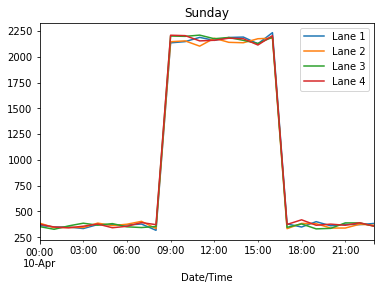

In [4]:
sunday_df_hourly = sunday_df.resample(rule='1H').sum()
sunday_df_hourly.plot()
plt.title('Sunday')
plt.show()

In [5]:
## Creating Monday data

## Creating Monday early morning data
mon_early_am = pd.period_range('2022-04-11 00:00:00', 
                               '2022-04-11 05:59:59', 
                               freq = 'S')
mon_early_seconds_am = len(mon_early_am)
monday_early_am_df = pd.DataFrame(mon_early_am)

## Creating Monday AM rush hour data
mon_rush_hour_am = pd.period_range('2022-04-11 06:00:00', 
                                   '2022-04-11 10:00:00', 
                                   freq = 'S')
mon_rush_hour_seconds_am = len(mon_rush_hour_am)
monday_rush_hour_am_df = pd.DataFrame(mon_rush_hour_am)

## Creating Monday midday data
mon_midday = pd.period_range('2022-04-11 10:00:01', 
                             '2022-04-11 14:59:59', 
                             freq = 'S')
mon_midday_seconds = len(mon_midday)
monday_midday_df = pd.DataFrame(mon_midday)

## Creating Monday PM rush hour data
monday_rush_hour_time_pm = pd.period_range('2022-04-11 15:00:00', 
                                           '2022-04-11 19:00:00', 
                                           freq = 'S')
rush_hour_seconds_pm = len(monday_rush_hour_time_pm)
monday_rush_hour_pm_df = pd.DataFrame(monday_rush_hour_time_pm)

## Creating Monday late night data
mon_late_pm = pd.period_range('2022-04-11 19:00:01', 
                              '2022-04-11 23:59:59', 
                              freq = 'S')
mon_late_seconds = len(mon_late_pm)
monday_late_df = pd.DataFrame(mon_late_pm)

## For loop to populate entire day for 4 lanes
for n in range(1, 5):
  monday_early_am_df.insert(n,
                            'Lane {0}'.format(n),
                            pd.Series(rng.binomial(n = 1,
                                                   p = off_hours,
                                                   size = mon_early_seconds_am)))
  monday_rush_hour_am_df.insert(n,
                                'Lane {0}'.format(n),
                                pd.Series(rng.binomial(n = 1,
                                                       p = rush_hour,
                                                       size = mon_rush_hour_seconds_am)))
  monday_midday_df.insert(n,
                          'Lane {0}'.format(n),
                          pd.Series(rng.binomial(n = 1,
                                                 p = steady_flow,
                                                 size = mon_midday_seconds)))
  monday_rush_hour_pm_df.insert(n,
                                'Lane {0}'.format(n),
                                pd.Series(rng.binomial(n = 1,
                                                       p = rush_hour,
                                                       size = rush_hour_seconds_pm)))
  monday_late_df.insert(n,
                        'Lane {0}'.format(n),
                        pd.Series(rng.binomial(n = 1,
                                               p = off_hours,
                                               size = mon_late_seconds)))
  

## Concat the tables to entire day
monday_df = pd.concat([monday_early_am_df,
                       monday_rush_hour_am_df,
                       monday_midday_df,
                       monday_rush_hour_pm_df,
                       monday_late_df])

## Converting to date time, and setting date/time as index
monday_df[0] = (monday_df[0]).apply(lambda d: pd.to_datetime(str(d)))
monday_df.rename(columns= {monday_df.columns[0] : 'Date/Time'},
                 inplace = True)
monday_df.set_index('Date/Time',
                    inplace = True,
                    drop = True)

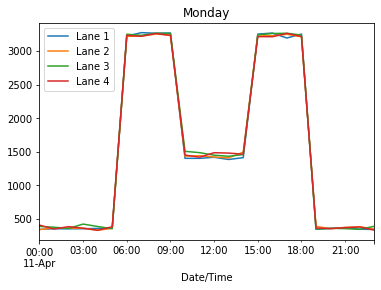

In [6]:
monday_df_hourly = monday_df.resample(rule='1H').sum()
monday_df_hourly.plot()
plt.title('Monday')
plt.show()

In [7]:
## Creating Tuesday data

## Creating Tuesday early morning data
tue_early_am = pd.period_range('2022-04-12 00:00:00', 
                               '2022-04-12 05:59:59', 
                               freq = 'S')
tue_early_seconds_am = len(tue_early_am)
tuesday_early_am_df = pd.DataFrame(tue_early_am)

## Creating Tuesday AM rush hour data
tue_rush_hour_am = pd.period_range('2022-04-12 06:00:00', 
                                   '2022-04-12 10:00:00', 
                                   freq = 'S')
tue_rush_hour_seconds_am = len(tue_rush_hour_am)
tuesday_rush_hour_am_df = pd.DataFrame(tue_rush_hour_am)

## Creating Tuesday midday data
tue_midday = pd.period_range('2022-04-12 10:00:01', 
                             '2022-04-12 14:59:59', 
                             freq = 'S')
tue_midday_seconds = len(tue_midday)
tuesday_midday_df = pd.DataFrame(tue_midday)

## Creating Tuesday PM rush hour data
tuesday_rush_hour_time_pm = pd.period_range('2022-04-12 15:00:00', 
                                           '2022-04-12 19:00:00', 
                                           freq = 'S')
rush_hour_seconds_pm = len(tuesday_rush_hour_time_pm)
tuesday_rush_hour_pm_df = pd.DataFrame(tuesday_rush_hour_time_pm)

## Creating Tuesday late night data
tue_late_pm = pd.period_range('2022-04-12 19:00:01', 
                              '2022-04-12 23:59:59', 
                              freq = 'S')
tue_late_seconds = len(tue_late_pm)
tuesday_late_df = pd.DataFrame(tue_late_pm)

## For loop to populate entire day for 4 lanes
for n in range(1, 5):
  tuesday_early_am_df.insert(n,
                            'Lane {0}'.format(n),
                            pd.Series(rng.binomial(n = 1,
                                                   p = off_hours,
                                                   size = tue_early_seconds_am)))
  tuesday_rush_hour_am_df.insert(n,
                                'Lane {0}'.format(n),
                                pd.Series(rng.binomial(n = 1,
                                                       p = rush_hour,
                                                       size = tue_rush_hour_seconds_am)))
  tuesday_midday_df.insert(n,
                          'Lane {0}'.format(n),
                          pd.Series(rng.binomial(n = 1,
                                                 p = steady_flow,
                                                 size = tue_midday_seconds)))
  tuesday_rush_hour_pm_df.insert(n,
                                'Lane {0}'.format(n),
                                pd.Series(rng.binomial(n = 1,
                                                       p = rush_hour,
                                                       size = rush_hour_seconds_pm)))
  tuesday_late_df.insert(n,
                        'Lane {0}'.format(n),
                        pd.Series(rng.binomial(n = 1,
                                               p = off_hours,
                                               size = tue_late_seconds)))
  

## Concat the tables to entire day
tuesday_df = pd.concat([tuesday_early_am_df,
                       tuesday_rush_hour_am_df,
                       tuesday_midday_df,
                       tuesday_rush_hour_pm_df,
                       tuesday_late_df])

## Converting to date time, and setting date/time as index
tuesday_df[0] = (tuesday_df[0]).apply(lambda d: pd.to_datetime(str(d)))
tuesday_df.rename(columns= {tuesday_df.columns[0] : 'Date/Time'},
                 inplace = True)
tuesday_df.set_index('Date/Time',
                    inplace = True,
                    drop = True)

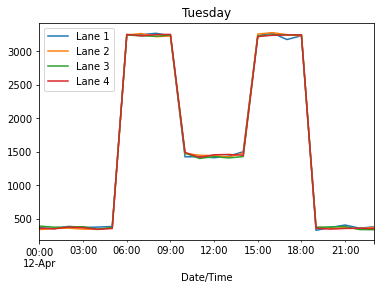

In [8]:
tuesday_df_hourly = tuesday_df.resample(rule='1H').sum()
tuesday_df_hourly.plot()
plt.title('Tuesday')
plt.show()

In [9]:
## Creating Wednesday data

## Creating Wednesday early morning data
wed_early_am = pd.period_range('2022-04-13 00:00:00', 
                               '2022-04-13 05:59:59', 
                               freq = 'S')
wed_early_seconds_am = len(wed_early_am)
wednesday_early_am_df = pd.DataFrame(wed_early_am)

## Creating Wednesday AM rush hour data
wed_rush_hour_am = pd.period_range('2022-04-13 06:00:00', 
                                   '2022-04-13 10:00:00', 
                                   freq = 'S')
wed_rush_hour_seconds_am = len(wed_rush_hour_am)
wednesday_rush_hour_am_df = pd.DataFrame(wed_rush_hour_am)

## Creating Wednesday midday data
wed_midday = pd.period_range('2022-04-13 10:00:01', 
                             '2022-04-13 14:59:59', 
                             freq = 'S')
wed_midday_seconds = len(wed_midday)
wednesday_midday_df = pd.DataFrame(wed_midday)

## Creating Wednesday PM rush hour data
wednesday_rush_hour_time_pm = pd.period_range('2022-04-13 15:00:00', 
                                           '2022-04-13 19:00:00', 
                                           freq = 'S')
rush_hour_seconds_pm = len(wednesday_rush_hour_time_pm)
wednesday_rush_hour_pm_df = pd.DataFrame(wednesday_rush_hour_time_pm)

## Creating Wednesday late night data
wed_late_pm = pd.period_range('2022-04-13 19:00:01', 
                              '2022-04-13 23:59:59', 
                              freq = 'S')
wed_late_seconds = len(wed_late_pm)
wednesday_late_df = pd.DataFrame(wed_late_pm)

## For loop to populate entire day for 4 lanes
for n in range(1, 5):
  wednesday_early_am_df.insert(n,
                            'Lane {0}'.format(n),
                            pd.Series(rng.binomial(n = 1,
                                                   p = off_hours,
                                                   size = wed_early_seconds_am)))
  wednesday_rush_hour_am_df.insert(n,
                                'Lane {0}'.format(n),
                                pd.Series(rng.binomial(n = 1,
                                                       p = rush_hour,
                                                       size = wed_rush_hour_seconds_am)))
  wednesday_midday_df.insert(n,
                          'Lane {0}'.format(n),
                          pd.Series(rng.binomial(n = 1,
                                                 p = steady_flow,
                                                 size = wed_midday_seconds)))
  wednesday_rush_hour_pm_df.insert(n,
                                'Lane {0}'.format(n),
                                pd.Series(rng.binomial(n = 1,
                                                       p = rush_hour,
                                                       size = rush_hour_seconds_pm)))
  wednesday_late_df.insert(n,
                        'Lane {0}'.format(n),
                        pd.Series(rng.binomial(n = 1,
                                               p = off_hours,
                                               size = wed_late_seconds)))
  

## Concat the tables to entire day
wednesday_df = pd.concat([wednesday_early_am_df,
                         wednesday_rush_hour_am_df,
                         wednesday_midday_df,
                         wednesday_rush_hour_pm_df,
                         wednesday_late_df])

## Converting to date time, and setting date/time as index
wednesday_df[0] = (wednesday_df[0]).apply(lambda d: pd.to_datetime(str(d)))
wednesday_df.rename(columns= {wednesday_df.columns[0] : 'Date/Time'},
                    inplace = True)
wednesday_df.set_index('Date/Time',
                       inplace = True,
                       drop = True)

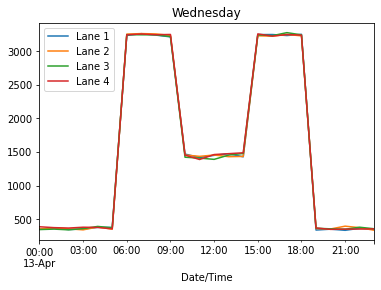

In [10]:
wednesday_df_hourly = wednesday_df.resample(rule='1H').sum()
wednesday_df_hourly.plot()
plt.title('Wednesday')
plt.show()

In [11]:
## Creating Thursday data

## Creating Thursday early morning data
thur_early_am = pd.period_range('2022-04-14 00:00:00', 
                                '2022-04-14 05:59:59', 
                                freq = 'S')
thur_early_seconds_am = len(thur_early_am)
thursday_early_am_df = pd.DataFrame(thur_early_am)

## Creating Thursday AM rush hour data
thur_rush_hour_am = pd.period_range('2022-04-14 06:00:00', 
                                    '2022-04-14 10:00:00', 
                                    freq = 'S')
thur_rush_hour_seconds_am = len(thur_rush_hour_am)
thursday_rush_hour_am_df = pd.DataFrame(thur_rush_hour_am)

## Creating Thursday midday data
thur_midday = pd.period_range('2022-04-14 10:00:01', 
                              '2022-04-14 14:59:59', 
                              freq = 'S')
thur_midday_seconds = len(thur_midday)
thursday_midday_df = pd.DataFrame(thur_midday)

## Creating Thursday PM rush hour data
thursday_rush_hour_time_pm = pd.period_range('2022-04-14 15:00:00', 
                                             '2022-04-14 19:00:00', 
                                             freq = 'S')
rush_hour_seconds_pm = len(thursday_rush_hour_time_pm)
thursday_rush_hour_pm_df = pd.DataFrame(thursday_rush_hour_time_pm)

## Creating Thursday late night data
thur_late_pm = pd.period_range('2022-04-14 19:00:01', 
                               '2022-04-14 23:59:59', 
                               freq = 'S')
thur_late_seconds = len(thur_late_pm)
thursday_late_df = pd.DataFrame(thur_late_pm)

## For loop to populate entire day for 4 lanes
for n in range(1, 5):
  thursday_early_am_df.insert(n,
                              'Lane {0}'.format(n),
                              pd.Series(rng.binomial(n = 1,
                                                     p = off_hours,
                                                     size = thur_early_seconds_am)))
  thursday_rush_hour_am_df.insert(n,
                                  'Lane {0}'.format(n),
                                  pd.Series(rng.binomial(n = 1,
                                                         p = rush_hour,
                                                         size = thur_rush_hour_seconds_am)))
  thursday_midday_df.insert(n,
                            'Lane {0}'.format(n),
                            pd.Series(rng.binomial(n = 1,
                                                   p = steady_flow,
                                                   size = thur_midday_seconds)))
  thursday_rush_hour_pm_df.insert(n,
                                  'Lane {0}'.format(n),
                                  pd.Series(rng.binomial(n = 1,
                                                         p = rush_hour,
                                                         size = rush_hour_seconds_pm)))
  thursday_late_df.insert(n,
                          'Lane {0}'.format(n),
                          pd.Series(rng.binomial(n = 1,
                                                 p = off_hours,
                                                 size = thur_late_seconds)))
  

## Concat the tables to entire day
thursday_df = pd.concat([thursday_early_am_df,
                         thursday_rush_hour_am_df,
                         thursday_midday_df,
                         thursday_rush_hour_pm_df,
                         thursday_late_df])

## Converting to date time, and setting date/time as index
thursday_df[0] = (thursday_df[0]).apply(lambda d: pd.to_datetime(str(d)))
thursday_df.rename(columns= {thursday_df.columns[0] : 'Date/Time'},
                   inplace = True)
thursday_df.set_index('Date/Time',
                      inplace = True,
                      drop = True)

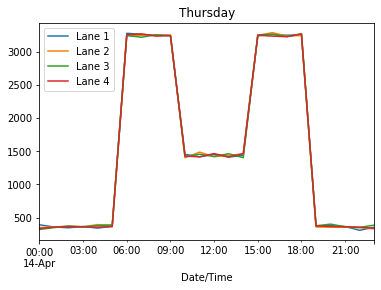

In [12]:
thursday_df_hourly = thursday_df.resample(rule='1H').sum()
thursday_df_hourly.plot()
plt.title('Thursday')
plt.show()

In [13]:
## Creating Friday data

## Creating Friday early morning data
fri_early_am = pd.period_range('2022-04-15 00:00:00', 
                               '2022-04-15 05:59:59', 
                               freq = 'S')
fri_early_seconds_am = len(fri_early_am)
friday_early_am_df = pd.DataFrame(fri_early_am)

## Creating Friday AM rush hour data
fri_rush_hour_am = pd.period_range('2022-04-15 06:00:00', 
                                   '2022-04-15 10:00:00', 
                                   freq = 'S')
fri_rush_hour_seconds_am = len(fri_rush_hour_am)
friday_rush_hour_am_df = pd.DataFrame(fri_rush_hour_am)

## Creating Friday midday data
fri_midday = pd.period_range('2022-04-15 10:00:01', 
                             '2022-04-15 14:59:59', 
                             freq = 'S')
fri_midday_seconds = len(fri_midday)
friday_midday_df = pd.DataFrame(fri_midday)

## Creating Friday PM rush hour data
friday_rush_hour_time_pm = pd.period_range('2022-04-15 15:00:00', 
                                           '2022-04-15 19:00:00', 
                                           freq = 'S')
rush_hour_seconds_pm = len(friday_rush_hour_time_pm)
friday_rush_hour_pm_df = pd.DataFrame(friday_rush_hour_time_pm)

## Creating Friday late night data
fri_late_pm = pd.period_range('2022-04-15 19:00:01', 
                              '2022-04-15 23:59:59', 
                              freq = 'S')
fri_late_seconds = len(fri_late_pm)
friday_late_df = pd.DataFrame(fri_late_pm)

## For loop to populate entire day for 4 lanes
for n in range(1, 5):
  friday_early_am_df.insert(n,
                            'Lane {0}'.format(n),
                            pd.Series(rng.binomial(n = 1,
                                                   p = off_hours,
                                                   size = fri_early_seconds_am)))
  friday_rush_hour_am_df.insert(n,
                                'Lane {0}'.format(n),
                                pd.Series(rng.binomial(n = 1,
                                                       p = rush_hour,
                                                       size = fri_rush_hour_seconds_am)))
  friday_midday_df.insert(n,
                          'Lane {0}'.format(n),
                          pd.Series(rng.binomial(n = 1,
                                                 p = steady_flow,
                                                 size = fri_midday_seconds)))
  friday_rush_hour_pm_df.insert(n,
                                'Lane {0}'.format(n),
                                pd.Series(rng.binomial(n = 1,
                                                       p = rush_hour,
                                                       size = rush_hour_seconds_pm)))
  friday_late_df.insert(n,
                        'Lane {0}'.format(n),
                        pd.Series(rng.binomial(n = 1,
                                               p = off_hours,
                                               size = fri_late_seconds)))
  

## Concat the tables to entire day
friday_df = pd.concat([friday_early_am_df,
                       friday_rush_hour_am_df,
                       friday_midday_df,
                       friday_rush_hour_pm_df,
                       friday_late_df])

## Converting to date time, and setting date/time as index
friday_df[0] = (friday_df[0]).apply(lambda d: pd.to_datetime(str(d)))
friday_df.rename(columns= {friday_df.columns[0] : 'Date/Time'},
                 inplace = True)
friday_df.set_index('Date/Time',
                    inplace = True,
                    drop = True)

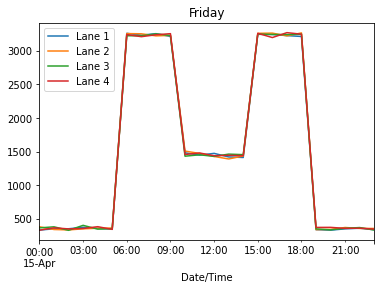

In [14]:
friday_df_hourly = friday_df.resample(rule='1H').sum()
friday_df_hourly.plot()
plt.title('Friday')
plt.show()

In [15]:
## Creating Saturday data

## Creating Saturday early morning data
sat_early_am = pd.period_range('2022-04-16 00:00:00', 
                               '2022-04-16 08:59:59', 
                               freq = 'S')
sat_early_seconds_am = len(sat_early_am)
sat_early_am_df = pd.DataFrame(sat_early_am)

## Creating Saturday weekend data
sat_midday = pd.period_range('2022-04-16 09:00:00', 
                             '2022-04-16 17:00:00', 
                             freq = 'S')
sat_midday_seconds = len(sat_midday)
sat_midday_df = pd.DataFrame(sat_midday)

## Creating Saturday late night data
sat_late_pm = pd.period_range('2022-04-16 17:00:01', 
                              '2022-04-16 23:59:59', 
                              freq = 'S')
sat_late_pm_seconds = len(sat_late_pm)
sat_late_pm_df = pd.DataFrame(sat_late_pm)

## For loop to populate entire day for 4 lanes
for n in range(1, 5):
  sat_early_am_df.insert(n,
                         'Lane {0}'.format(n),
                         pd.Series(rng.binomial(n = 1,
                                                p = off_hours,
                                                size = sat_early_seconds_am)))
  sat_midday_df.insert(n,
                       'Lane {0}'.format(n),
                       pd.Series(rng.binomial(n = 1,
                                              p = weekend_traffic,
                                              size = sat_midday_seconds)))
  sat_late_pm_df.insert(n,
                        'Lane {0}'.format(n),
                        pd.Series(rng.binomial(n = 1,
                                               p = off_hours,
                                               size = sat_late_pm_seconds)))
  
  ## Concat the tables to entire day
saturday_df = pd.concat([sat_early_am_df,
                         sat_midday_df,
                         sat_late_pm_df,])

## Converting to date time, and setting date/time as index
saturday_df[0] = (saturday_df[0]).apply(lambda d: pd.to_datetime(str(d)))
saturday_df.rename(columns= {saturday_df.columns[0] : 'Date/Time'},
                   inplace = True)
saturday_df.set_index('Date/Time',
                      inplace = True,
                      drop = True)

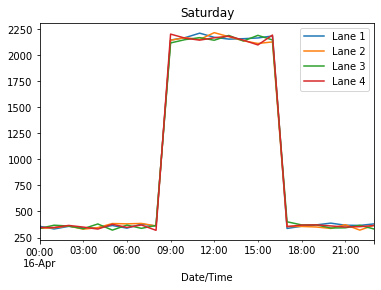

In [16]:
saturday_df_hourly = saturday_df.resample(rule='1H').sum()
saturday_df_hourly.plot()
plt.title('Saturday')
plt.show()

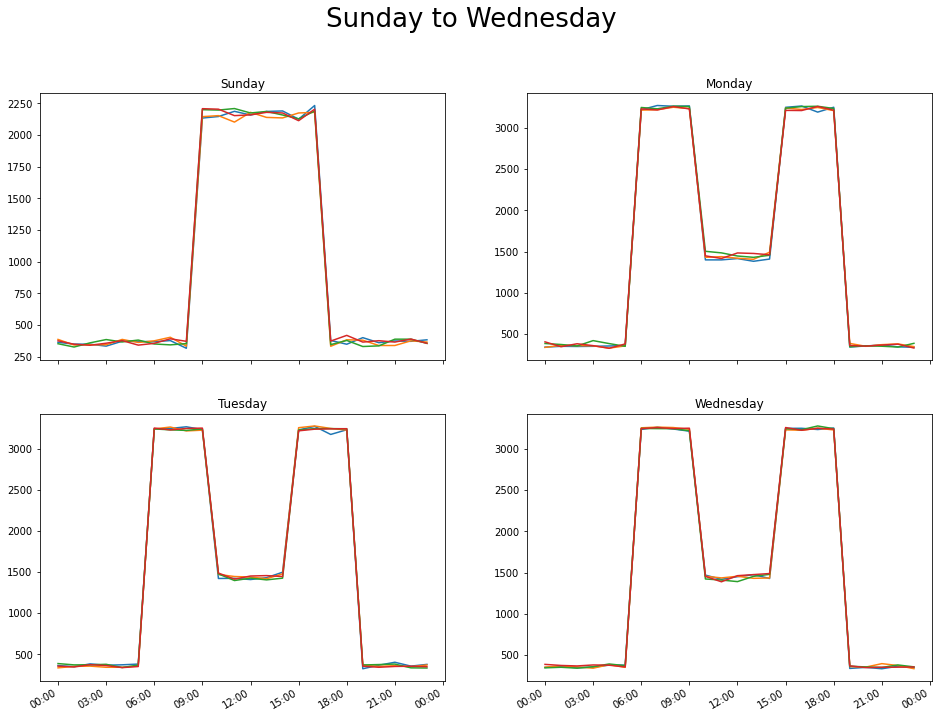

In [17]:
fig1, axis1 = plt.subplots(2, 2,
                           figsize=(16,12))
fig1.suptitle('Sunday to Wednesday',
              fontsize=26)
fig1.autofmt_xdate()
axis1[0,0].plot(sunday_df_hourly)
axis1[0,0].set_title('Sunday')
axis1[0,1].plot(monday_df_hourly)
axis1[0,1].set_title('Monday')
axis1[1,0].plot(tuesday_df_hourly)
axis1[1,0].set_title('Tuesday')
axis1[1,1].plot(wednesday_df_hourly)
axis1[1,1].set_title('Wednesday')

for i, ax in enumerate(axis1.flatten()):
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))

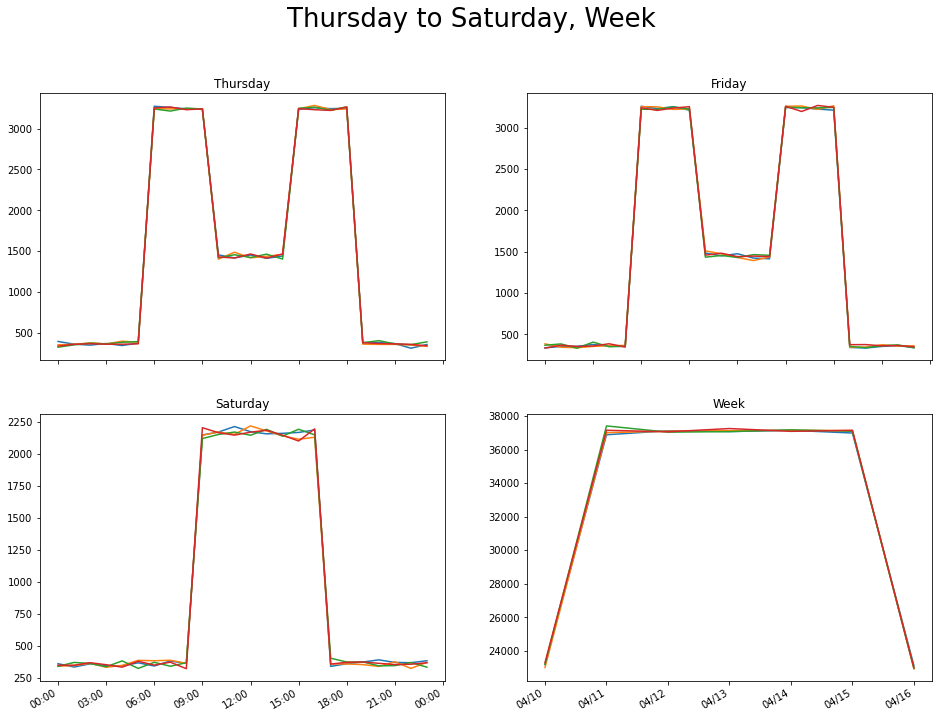

In [20]:
week_df = pd.concat([sunday_df,
                     monday_df,
                     tuesday_df,
                     wednesday_df,
                     thursday_df,
                     friday_df,
                     saturday_df])
week_df_daily = week_df.resample(rule='1D').sum()

fig2, axis2 = plt.subplots(2, 2,
                           figsize=(16,12))
fig2.suptitle('Thursday to Saturday, Week',
              fontsize=26)
fig2.autofmt_xdate()
axis2[0,0].plot(thursday_df_hourly)
axis2[0,0].set_title('Thursday')
axis2[0,1].plot(friday_df_hourly)
axis2[0,1].set_title('Friday')
axis2[1,0].plot(saturday_df_hourly)
axis2[1,0].set_title('Saturday')
axis2[1,1].plot(week_df_daily)
axis2[1,1].set_title('Week')

for i, ax in enumerate(axis2.flatten()):
  if i != 3:
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
  else:
    ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))